<a href="https://colab.research.google.com/github/nikishkaaa/ML-Course/blob/main/HW_2_5_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [129]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
!ls 'drive/MyDrive/ML Course'

application_data.csv.zip	HW_2_1_Аналіз_ознак_для_побудови_лінійної_регресії.ipynb
application_data_processed.zip	medical-charges.csv
cars.csv


In [132]:
df = pd.read_csv("drive/MyDrive/ML Course/cars.csv")
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [134]:
df.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [135]:
df['Brand'].unique()

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

In [136]:
df['Model'].unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

In [137]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Third'], dtype=object)

In [138]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel'], dtype=object)

In [139]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

#### Висновок: набір даних містить 12 колонок, з них 5 категоріальних і 7 числових:
- 2 бінарні (Transmission і Fuel Type)
- 9 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 1 колонкf, в якій можна встановити відношення порядку (Owner_Type)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [140]:
target = df['Price']

In [141]:
X = df[['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

## Fuel_Type і Transmission

<Axes: xlabel='Fuel_Type', ylabel='Price'>

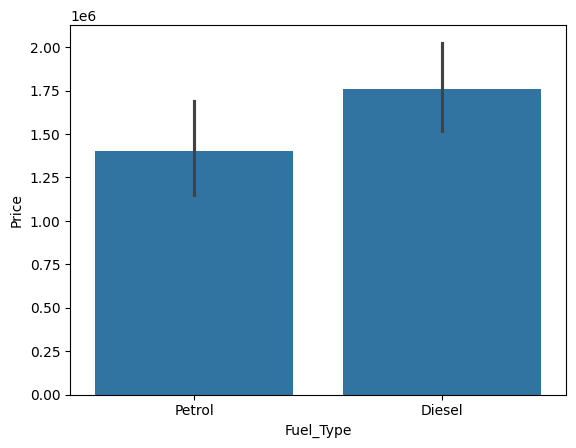

In [143]:
sns.barplot(data=df, x='Fuel_Type', y='Price')

<Axes: xlabel='Transmission', ylabel='Price'>

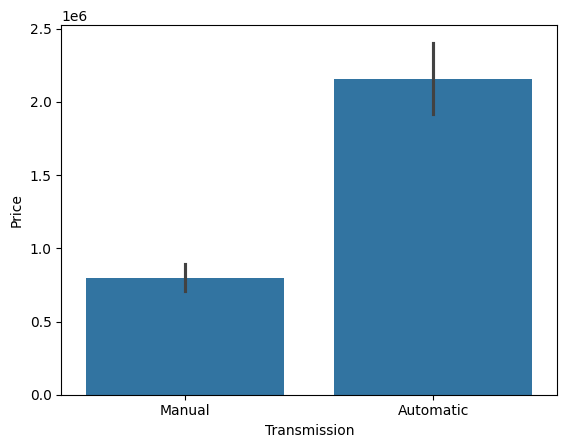

In [144]:
sns.barplot(data=df, x='Transmission', y='Price')

In [145]:
fuel_codes = {'Petrol': 0, 'Diesel': 1}
df['fuel_code'] = df.Fuel_Type.map(fuel_codes)

In [146]:
transmission_codes = {'Manual': 0, 'Automatic': 1}
df['transmission_code'] = df.Transmission.map(transmission_codes)

In [147]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,fuel_code,transmission_code
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,0,0
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,0,1
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,0,1
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,1,0
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,1,1


## Brand

In [148]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [149]:
one_hot = enc.transform(X_train[['Brand']]).toarray()
##one_hot

In [150]:
X_train[enc.categories_[0]] = one_hot

In [151]:
X_train

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,Mahindra,Scorpio,2018,45000,Diesel,Automatic,Second,15,2179,140,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27,28,BMW,X3,2019,22000,Diesel,Automatic,Second,18,1995,187,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
one_hot_test = enc.transform(X_test[['Brand']]).toarray()
##one_hot

In [153]:
X_test[enc.categories_[0]] = one_hot_test
X_test

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,32,Hyundai,Elantra,2017,32000,Diesel,Automatic,Second,22,1582,126,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
89,90,Hyundai,Venue,2018,32000,Petrol,Manual,Third,17,1197,81,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15,16,Honda,City,2017,42000,Diesel,Manual,Second,25,1498,98,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,22,Ford,Figo,2020,15000,Petrol,Manual,Third,18,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,61,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Owner_Type

In [154]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [155]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

Цей код визначає порядковість для наших значень: для 1 власника-0, для другого-1, для третього-2. І таким чином кодує категоріальну змінну и числову в нову колонку Owner_Type_Codes

## Model

Спочатку зменшимо к-ть унікальних значень до 5. Зробимо це настпуним чином:
- порахуємо к-ть значень в датасеті для кожного унікального значення моделі авто
- 5 найпопулярніші залишимо, а всі інші віднесемо до категорії Other
- використаємо One-hot encoding для кодування 5 унікальних значень

In [156]:
df["Model"].unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

In [157]:
df_model = pd.DataFrame({'Car_Model': df["Model"]})

In [158]:
model_counts = df_model['Car_Model'].value_counts()

In [159]:
top_models = model_counts.head(5).index
top_models

Index(['Mustang', 'Altroz', 'C-Class', 'Verna', 'Fortuner'], dtype='object', name='Car_Model')

In [160]:
X_train['Car_Model_Reduced'] = X_train['Model'].apply(lambda x: x if x in top_models else 'Other')
X_test['Car_Model_Reduced'] = X_test['Model'].apply(lambda x: x if x in top_models else 'Other')
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Car_Model_Reduced
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Other
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Other
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Other


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Car_Model_Reduced
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Other
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Other
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Other
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Other
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Other


(None, None)

In [161]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Car_Model_Reduced']])
enc.categories_

[array(['Altroz', 'C-Class', 'Fortuner', 'Mustang', 'Other', 'Verna'],
       dtype=object)]

In [162]:
one_hot_model = enc.transform(X_train[['Car_Model_Reduced']]).toarray()
one_hot_model_test = enc.transform(X_test[['Car_Model_Reduced']]).toarray()

In [163]:
X_train[enc.categories_[0]] = one_hot_model
X_test[enc.categories_[0]] = one_hot_model_test
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Car_Model_Reduced,Altroz,C-Class,Fortuner,Mustang,Other,Verna
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Other,0.0,0.0,0.0,0.0,1.0,0.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other,0.0,0.0,0.0,0.0,1.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other,0.0,0.0,0.0,0.0,1.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Other,0.0,0.0,0.0,0.0,1.0,0.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Other,0.0,0.0,0.0,0.0,1.0,0.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Car_Model_Reduced,Altroz,C-Class,Fortuner,Mustang,Other,Verna
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Other,0.0,0.0,0.0,0.0,1.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Other,0.0,0.0,0.0,0.0,1.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Other,0.0,0.0,0.0,0.0,1.0,0.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Other,0.0,0.0,0.0,0.0,1.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Other,0.0,0.0,0.0,0.0,1.0,0.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [164]:
X_train = X_train.select_dtypes(exclude=object)
concat_X = pd.concat([X_train, y_train], axis=1)

In [165]:
corr = concat_X.corr()
corr.style.background_gradient(cmap='coolwarm')

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Altroz,C-Class,Fortuner,Mustang,Other,Verna,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,0.038923,0.061711,0.012831,-0.023580,-0.038377,-0.027435,0.044398,0.025560
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,0.288394,0.053569,-0.051792,-0.005137,-0.190089,0.091083,-0.233769
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.223065,-0.093908,0.168300,-0.151311,0.194785,-0.058719,-0.083951
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,0.169995,-0.061488,-0.237671,-0.292970,0.127282,0.161381,-0.638404
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,-0.213924,0.015909,0.205859,0.374785,-0.139846,-0.090520,0.710561
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,-0.198511,0.050373,0.013988,0.554604,-0.175805,-0.093193,0.849137
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,-0.059919,-0.059919,0.383470,-0.326225,0.088001,-0.048609,0.000979
Audi,0.089473,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,-0.065795,-0.065795,-0.053376,-0.065795,0.146829,-0.053376,0.328858
BMW,0.048335,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.118678,1.000000,-0.126761,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.009076,-0.070276,-0.070276,-0.057011,-0.070276,0.156829,-0.057011,0.477522
Ford,-0.020240,-0.150454,-0.009761,-0.296480,0.184231,0.240501,-0.161451,-0.118678,-0.126761,1.000000,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.190586,-0.070276,-0.070276,-0.057011,0.554400,-0.164872,-0.057011,-0.004592


Колонки, які корелюють з цільовою змінною більше ніж 0.5:
- Mileage
- Power
- Engine

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [166]:
X_test = X_test.select_dtypes(exclude=object)

In [167]:
lin_reg = LinearRegression().fit(X_train, y_train)
predictions = lin_reg.predict(X_test)
loss = mean_squared_error(y_test, predictions, squared=False)
print('RMSE Test:', loss)

RMSE Test: 233887.4063252688


In [168]:
df['Price'].describe()

count    1.000000e+02
mean     1.574000e+06
std      1.000265e+06
min      4.500000e+05
25%      7.000000e+05
50%      1.300000e+06
75%      2.500000e+06
max      4.000000e+06
Name: Price, dtype: float64

In [169]:
train_predictions = lin_reg.predict(X_train)
loss_train = mean_squared_error(y_train, train_predictions, squared=False)
print('RMSE Train:', loss_train)

RMSE Train: 203601.39832161184


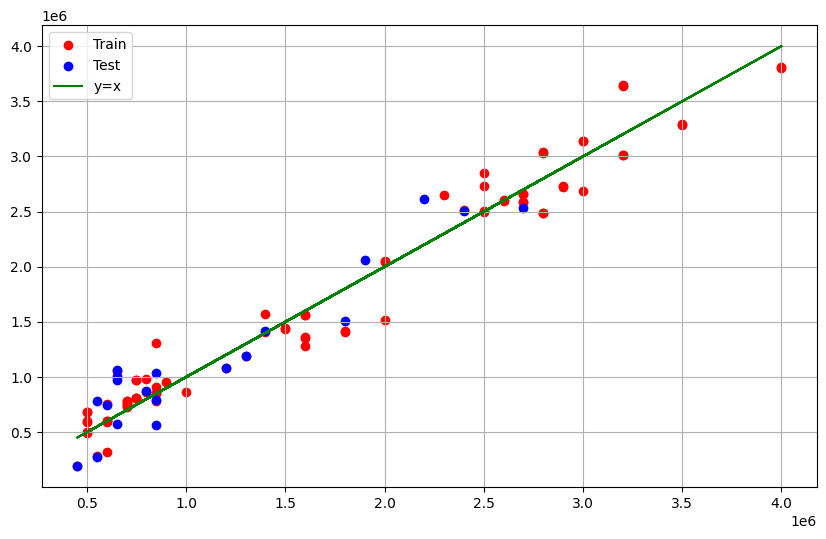

In [170]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='red', label='Train')
plt.scatter(y_test, predictions, color='blue', label='Test')
plt.plot(y_train, y_train, color='green', label='y=x')
plt.legend()
plt.grid(True)
plt.show()

#### Висновок: наша модель формує діагональ, з невеликим розкидом точок а також RMSE дуже маленький порівняно з std. Отже працює добре

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [171]:
numeric_col = ['Year', 'Kilometers_Driven', 'Mileage','Engine', 'Power', 'Seats']
scaler = StandardScaler()
scaler.fit(X_train[numeric_col])

StandardScaler()

In [172]:
scaler.mean_, scaler.var_

(array([2.0183625e+03, 2.8362500e+04, 1.7062500e+01, 1.9107375e+03,
        1.6688750e+02, 5.2250000e+00]),
 array([1.25609375e+00, 8.40810938e+07, 1.16335937e+01, 4.31270294e+05,
        6.62974984e+03, 5.49375000e-01]))

In [173]:
scaled_inputs = scaler.transform(X_train[numeric_col])

In [174]:
scaled_inputs_test = scaler.transform(X_test[numeric_col])

In [175]:
cat_cols = ['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen', 'Owner_Type_Codes', 'Altroz', 'C-Class', 'Fortuner', 'Mustang', 'Other', 'Verna']
categorical_data_train = X_train[cat_cols].values

categorical_data_test = X_test[cat_cols].values

In [176]:
inputs_train = np.concatenate((scaled_inputs, categorical_data_train), axis=1)
inputs_train.shape
inputs_train

array([[ 0.56881254, -0.69387081,  0.27486176, ...,  0.        ,
         1.        ,  0.        ],
       [-0.32344242, -0.03953291, -0.01832412, ...,  0.        ,
         1.        ,  0.        ],
       [-0.32344242, -0.03953291, -0.60469588, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.32344242,  1.81442446, -0.60469588, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56881254, -0.69387081,  0.27486176, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56881254, -0.69387081, -0.60469588, ...,  0.        ,
         1.        ,  0.        ]])

In [177]:
column_names = numeric_col + cat_cols
inputs_df = pd.DataFrame(inputs_train, columns=column_names)
inputs_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Altroz,C-Class,Fortuner,Mustang,Other,Verna
0,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.461068,0.178580,1.740791,-1.009176,-1.140798,-0.303562,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
76,-1.215697,-0.911983,-2.070625,4.629524,2.801564,-1.652729,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77,-0.323442,1.814424,-0.604696,0.408494,-0.330219,2.394771,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
78,0.568813,-0.693871,0.274862,0.128310,0.247012,-0.303562,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [178]:
inputs_test = np.concatenate((scaled_inputs_test, categorical_data_test), axis=1)
inputs_test.shape

(20, 24)

In [179]:
lin_reg2 = LinearRegression().fit(inputs_train, y_train)
predictions2 = lin_reg2.predict(inputs_test)
loss = mean_squared_error(y_test, predictions2, squared=False)
print('RMSE Test:', loss)

RMSE Test: 232950.54578757318


In [180]:
lin_reg2.coef_

array([  -8389.37892857,  -28804.99754657,    9343.78438354,
         31919.06623093,  621019.47981902,   20762.38276334,
        694378.18190018,  766195.20061775,  -13017.8232358 ,
       -416816.3377535 , -366174.59698885, -404911.69276721,
       -286367.8724559 ,  725570.66230183, -434567.75964721,
       -225806.38276152,  -38481.57920977, -201475.76248586,
       -114173.68589811,   25303.28129524, 1037853.05346173,
       -919137.50321074,  -32205.37827904,    2360.23263092])

In [181]:
lin_reg2.intercept_

1785855.680624276

In [182]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_col + cat_cols, 1),
    'weight': np.append(lin_reg2.coef_, lin_reg2.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
24,1,1.785856e+06
20,Fortuner,1.037853e+06
7,BMW,7.661952e+05
13,Mercedes,7.255707e+05
6,Audi,6.943782e+05
4,Power,6.210195e+05
3,Engine,3.191907e+04
19,C-Class,2.530328e+04
5,Seats,2.076238e+04
2,Mileage,9.343784e+03


Найважливіші характеристики:
- Power
- Milage

З категоріальних:
- BMW
- Mercedes
- Audi

З точки зору значення відповідних змінних це логічно, що вони впливають на цільову змінну саме в напрямі збільшення

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [185]:
y_train

83    1600000
55    2600000
26    3200000
54     650000
19    2500000
       ...   
3      600000
2     2500000
6      900000
27    2800000
75    3500000
Name: Price, Length: 80, dtype: int64

In [186]:
Y = y_train
X = sm.add_constant(inputs_df)
model = sm.OLS(y_train.values, X)
results = model.fit()
results.params

const                1.420078e+06
Year                -8.389379e+03
Kilometers_Driven   -2.880500e+04
Mileage              9.343784e+03
Engine               3.191907e+04
Power                6.210195e+05
Seats                2.076238e+04
Audi                 8.234762e+05
BMW                  8.952932e+05
Ford                 1.160802e+05
Honda               -2.877183e+05
Hyundai             -2.370766e+05
Mahindra            -2.758137e+05
Maruti              -1.572699e+05
Mercedes             8.546687e+05
Tata                -3.054698e+05
Toyota              -9.670838e+04
Volkswagen           9.061642e+04
Owner_Type_Codes    -2.014758e+05
Altroz               1.225060e+05
C-Class              2.619829e+05
Fortuner             1.274533e+06
Mustang             -6.824578e+05
Other                2.044743e+05
Verna                2.390399e+05
dtype: float64

In [187]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     64.20
Date:                Wed, 29 May 2024   Prob (F-statistic):           2.25e-32
Time:                        16:22:16   Log-Likelihood:                -1091.4
No. Observations:                  80   AIC:                             2229.
Df Residuals:                      57   BIC:                             2284.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.42e+06   6.27e+0

Ознаки,які є стат значущими на рівні значущості 0.05, оскільки їх p-value< 0.05:
- Power
- BMW
- Audi
- Honda
- Mahindra
- Mercedes
- Tata
- Owner_Type_Codes
- Fortuner
- Mustang
- Other

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [188]:
stats_col = ['Power', 'BMW', 'Audi', 'Honda', 'Mahindra', 'Mercedes', 'Tata', 'Owner_Type_Codes', 'Fortuner', 'Mustang', 'Other']
inputs_df_task9 = inputs_df[stats_col]

Y = y_train
X = sm.add_constant(inputs_df_task9)
model = sm.OLS(y_train.values, X)
results = model.fit()
results.params

const               1.533417e+06
Power               6.527117e+05
BMW                 9.375006e+05
Audi                8.651586e+05
Honda              -2.121916e+05
Mahindra           -2.189426e+05
Mercedes            9.216795e+05
Tata               -2.708928e+05
Owner_Type_Codes   -1.951850e+05
Fortuner            1.104752e+06
Mustang            -7.340413e+05
Other               4.269609e+04
dtype: float64

In [189]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     126.5
Date:                Wed, 29 May 2024   Prob (F-statistic):           9.04e-41
Time:                        16:37:45   Log-Likelihood:                -1098.8
No. Observations:                  80   AIC:                             2222.
Df Residuals:                      68   BIC:                             2250.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.533e+06   1.24e+05  

R2 наближається до 1, отже модель працює добре. В порівнянні з попередньою моделлю трохи знизився
Adj. R-squared не змінився

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [191]:
stats_col_2 = ['Power', 'BMW', 'Audi', 'Honda', 'Mahindra', 'Mercedes', 'Tata', 'Owner_Type_Codes', 'Fortuner', 'Mustang', 'Other', 'Maruti', 'C-Class', 'Verna']
inputs_df_task10 = inputs_df[stats_col_2]

Y = y_train
X = sm.add_constant(inputs_df_task9)
model = sm.OLS(y_train.values, X)
results = model.fit()
results.params

const               1.547818e+06
Power               6.484839e+05
BMW                 9.143778e+05
Audi                8.417501e+05
Honda              -2.404749e+05
Mahindra           -2.490948e+05
Mercedes            8.602873e+05
Tata               -2.956371e+05
Owner_Type_Codes   -1.900310e+05
Fortuner            1.085566e+06
Mustang            -7.365636e+05
Other               5.240680e+04
Maruti             -1.371718e+05
C-Class             1.264018e+05
Verna              -1.303763e+05
dtype: float64

In [192]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     98.33
Date:                Wed, 29 May 2024   Prob (F-statistic):           4.15e-38
Time:                        16:42:20   Log-Likelihood:                -1097.5
No. Observations:                  80   AIC:                             2225.
Df Residuals:                      65   BIC:                             2261.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.548e+06   1.91e+05  

 R2 і Adj. R-squared трохи зменшились, але не критично. Я би залишила модель з завдання 8, тому що вона має найкращі результати роботи серед 3 останніх